In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
archivoCSV= "/content/drive/MyDrive/Titanic.csv"
df = pd.read_csv(archivoCSV)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:

total= len(df['Age'])
nulos = df['Age'].isnull().sum()
porcentaje = (nulos / total) * 100
print(f"Porcentaje de valores nulos en la columna 'Age': {porcentaje:.2f}%")

Porcentaje de valores nulos en la columna 'Age': 19.87%


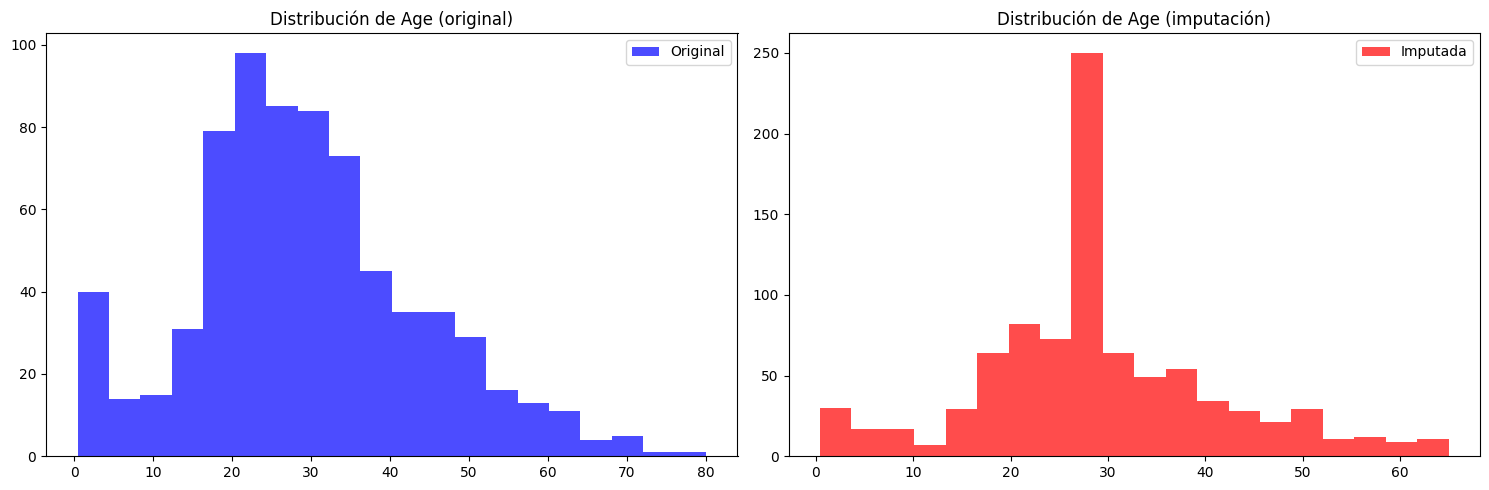

In [4]:
import matplotlib.pyplot as plt

#cuartiles
orden = sorted(df['Age'].dropna())
n = len(orden)
q1 = orden[int(n * 0.25)]
q3 = orden[int(n * 0.75)]
iqr = q3 - q1
li = q1 - 1.5 * iqr
ls = q3 + 1.5 * iqr

# Imputar mediana
for i, age in enumerate(df['Age']):
    if pd.isnull(age) or age < li or age > ls:
        df.at[i, 'Age'] = (q1 + q3) / 2


#graficas

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(orden, bins=20, color='blue', alpha=0.7, label='Original')
ax1.set_title('Distribución de Age (original)')
ax1.legend()

ax2.hist(df['Age'], bins=20, color='red', alpha=0.7, label='Imputada')
ax2.set_title('Distribución de Age (imputación)')
ax2.legend()

plt.tight_layout()

plt.show()


In [5]:
total= len(df['Age'])
nulos = df['Age'].isnull().sum()
porcentaje = (nulos / total) * 100
print(f"Porcentaje de valores nulos en la columna 'Age': {porcentaje:.2f}%")

Porcentaje de valores nulos en la columna 'Age': 0.00%
